In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()



X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1,test_size=0.2, train_size=0.8, random_state=0)
train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [2]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

clf.fit(X_train, y_train)


/home/ma/.bin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3]:
clf.score(X_test, y_test)


0.9473684210526315

In [4]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [5]:
np.count_nonzero(y_test==0), np.count_nonzero(y_test==1)


(47, 67)

In [6]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
y_pred = clf.predict(X_test)


In [8]:
conf_mat = np.zeros([2,2])

for true_label, est_label in zip(y_test, y_pred):
    conf_mat[true_label, est_label] +=1

print(conf_mat)


[[45.  2.]
 [ 4. 63.]]


In [9]:
df = pd.DataFrame(conf_mat, columns=['pred 0', 'pred 1'], index=['true 0', 'true 1'])


In [10]:
df

,pred 0,pred 1
true 0,45.0,2.0
true 1,4.0,63.0


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [12]:
accuracy_score(y_test,y_pred)

0.9473684210526315

In [13]:
cmat = confusion_matrix(y_test, y_pred)

In [14]:
cmat

array([[45,  2],
       [ 4, 63]])

In [15]:
TP = cmat[0,0] #true positive


In [16]:
TN = cmat[1,1] #true negative

In [17]:
FP = cmat[1,0]

In [18]:
FN = cmat[0,1]

In [19]:
from sklearn.datasets import load_digits

data = load_digits()


In [20]:
X = data.data
y= data.target

img = data.images
 


In [21]:
X[0].shape

(64,)

In [22]:
img[0].shape

(8, 8)

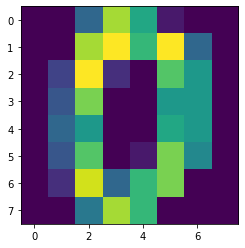

In [23]:
plt.imshow(img[0])

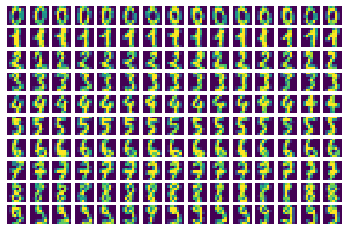

In [27]:
for i in range(10):
    i_th_digit = data.images[data.target==i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')



In [28]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [29]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


/home/ma/.bin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667

In [30]:
y_pred = clf.predict(X_test)


In [31]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [32]:
conf_mat = confusion_matrix(y_test, y_pred)

df = pd.DataFrame(conf_mat,
                  columns=range(0,10),
                  index=range(0,10))


In [33]:
df

,0,1,2,3,4,5,6,7,8,9
0,27,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,0,0,0,1,0
2,0,0,35,1,0,0,0,0,0,0
3,0,0,0,29,0,0,0,0,0,0
4,0,0,0,0,29,0,0,1,0,0
5,0,0,0,0,0,37,0,0,0,3
6,0,1,0,0,0,0,43,0,0,0
7,0,0,0,0,1,0,0,38,0,0
8,0,2,1,0,0,0,0,0,36,0
9,0,0,0,0,0,1,0,0,0,40


In [34]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)


0.95

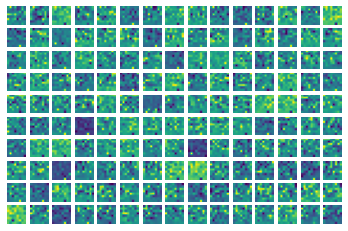

In [35]:
for i in range(10):
    i_th_digit = X_train_pca[y_train==i]
    for j in range(0,15):
        plt.subplot(10, 15, i * 15 + j  +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation=None)


In [37]:
y_pred_pca = clf.predict(X_test_pca)

conf_mat = confusion_matrix(y_test, y_pred_pca)

df = pd.DataFrame(conf_mat,
                  columns=range(0,10),
                  index=range(0,10))


In [38]:
df

,0,1,2,3,4,5,6,7,8,9
0,27,0,0,0,0,0,0,0,0,0
1,0,32,0,0,0,0,0,0,3,0
2,1,1,32,2,0,0,0,0,0,0
3,0,0,0,29,0,0,0,0,0,0
4,0,0,0,0,29,0,0,1,0,0
5,0,1,0,0,0,37,0,0,0,2
6,0,1,0,0,0,0,43,0,0,0
7,0,1,0,0,1,0,0,37,0,0
8,0,2,1,0,0,0,0,0,36,0
9,0,0,0,0,0,1,0,0,0,40


In [40]:
scores = []

for i in range(1,65):
    clf.fit(X_train_pca[:, 0:i], y_train)
    score = clf.score(X_test_pca[:, 0:i], y_test)
    print(i, score)
    scores.append(score)

scores = np.array(scores)


1 0.3861111111111111
2 0.5833333333333334
3 0.6694444444444444
4 0.7916666666666666
5 0.8416666666666667
6 0.8638888888888889
7 0.8916666666666667
8 0.8944444444444445
9 0.9194444444444444
10 0.9277777777777778
11 0.9416666666666667
12 0.9388888888888889
13 0.9361111111111111
14 0.9472222222222222
15 0.9472222222222222
16 0.9555555555555556
17 0.9527777777777777
18 0.9611111111111111
19 0.9555555555555556
20 0.9527777777777777
21 0.95
22 0.9444444444444444
23 0.9472222222222222
24 0.9444444444444444
25 0.95
26 0.9527777777777777
27 0.9527777777777777
28 0.9555555555555556
29 0.95
30 0.9527777777777777
31 0.95
32 0.9527777777777777
33 0.9527777777777777
34 0.9583333333333334
35 0.9555555555555556
36 0.9555555555555556
37 0.9527777777777777
38 0.9527777777777777
39 0.9555555555555556
40 0.9611111111111111
41 0.9638888888888889
42 0.9638888888888889
43 0.9666666666666667
44 0.9666666666666667
45 0.9611111111111111
46 0.9611111111111111
47 0.9611111111111111
48 0.9611111111111111
49 0.9611

(0.9, 1.0)

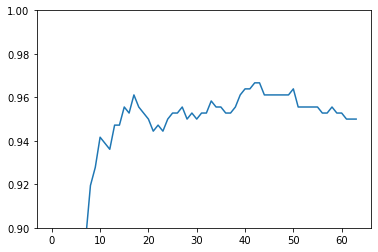

In [41]:
plt.plot(scores)
plt.ylim(0.9, 1)
